In [1]:
from annoy import AnnoyIndex
import pandas as pd
import numpy as np
import cv2
import sys  
import matplotlib.pyplot as plt
sys.path.insert(0, '../')
sys.path.insert(0, './utils')
from utils_color_extractor import ColorFeaturesExtractor
from retriever import Retriever

In [2]:
# extract feature from input img
img_path = '../test_imgs/retrieval.jpg'
img = cv2.imread(img_path)
cfe = ColorFeaturesExtractor((24,26,3), 0.6)
img_features = cfe.extract(img, True)

In [3]:
df_names = pd.read_csv('../train_filtered.csv')

In [4]:
df_features = pd.read_csv('../color_features/color_features.csv', sep='\t', header=None)

In [5]:
# # align indexes
# df_names.reset_index(inplace=True, drop=True)
# df_features.reset_index(inplace=True, drop=True)

In [6]:
# instantiate retriever
retriever = Retriever('./indexes/')

In [12]:
# create index
retriever.create_index(df_features, retrieval_mode='color_centered', metric = 'euclidean')

In [13]:
# retrieve images
indexes = retriever.retrieve(img_features, retrieval_mode='color_centered', n_neighbours=5, include_distances=False)

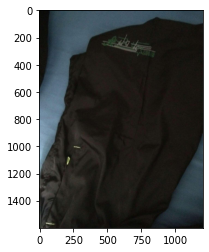

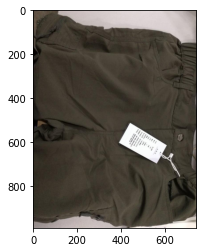

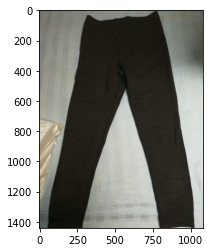

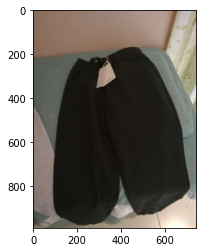

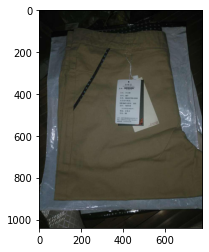

In [14]:
for index, row in df_names.iloc[indexes].iterrows():
    tmp = cv2.imread('../data/train/' + row['name'])
    tmp = cv2.cvtColor(tmp, cv2.COLOR_BGR2RGB)
    plt.imshow(tmp)
    plt.show()

In [9]:
# test delete index
retriever.delete_index('color_centered_euc')